<a href="https://colab.research.google.com/github/James-Burgess/ML-notebooks/blob/master/notebooks/3-computer_vision_fashion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [ ]:
# load data from mnst dataset
# thank you smart people
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

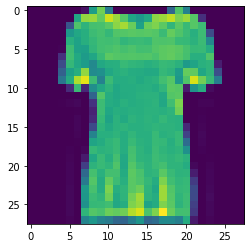

In [4]:
# quick peek at the data
import matplotlib.pyplot as plt
plt.imshow(training_images[10])

In [7]:
# Prepare the data for training and tests
training_images = training_images / 255.0
test_images = test_images / 255.0

In [17]:
# create a model 
"""
Dense: Adds a layer of neurons

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] 
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1028, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])



In [22]:
# Build the model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3648 - accuracy: 0.8705
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3565 - accuracy: 0.8723
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3486 - accuracy: 0.8748
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3405 - accuracy: 0.8774
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3337 - accuracy: 0.8802


In [21]:
# training with a callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1872/1875 [============================>.] - ETA: 0s - loss: 0.3744 - accuracy: 0.8662
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3745 - accuracy: 0.8661


In [23]:
# test the model against unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3803 - accuracy: 0.8646


[0.3802826404571533, 0.8646000027656555]